In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/wholetime.csv')

/var/folders/pm/4cgtm7w90fbgczj718s4vvk40000gn/T/ipykernel_9335/2641153119.py:1: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/wholetime.csv')


In [3]:
df.columns

Index(['end_lat', 'end_lng', 'end_station_id', 'end_station_name', 'ended_at',
       'member_casual', 'ride_id', 'rideable_type', 'start_lat', 'start_lng',
       'start_station_id', 'start_station_name', 'started_at', 'distance',
       'start_lat_lng', 'end_lat_lng'],
      dtype='object')

In [29]:
# dfの要素をstr型に変換
df = df.astype(str)

In [4]:
# ノード数とエッジ数を取得
# データフレームの中で、ユニークなstart_station_idの数を数える

# ノード数
n_nodes = len(df['start_station_id'].unique())
# エッジ数
n_edges = len(df)

In [5]:
n_nodes, n_edges

(2791, 18953057)

In [6]:
# start_station_idとend_station_idのペアを作成
# データフレームの中で、start_station_idとend_station_idのペアを作成する
df_edge = df[['start_station_id', 'end_station_id']]
df_edge = df_edge.groupby(['start_station_id', 'end_station_id']).size().reset_index()
df_edge.columns = ['start_station_id', 'end_station_id', 'count']
df_edge.head()

,start_station_id,end_station_id,count
0,2,2.0,4860
1,2,3.0,187
2,2,4.0,92
3,2,5.0,75
4,2,6.0,118


In [8]:
# start_station_idの値に.0がついている場合、重複とみなして削除する
df_edge['start_station_id'] = df_edge['start_station_id'].astype(str).str.replace('.0', '')
df_edge['end_station_id'] = df_edge['end_station_id'].astype(str).str.replace('.0', '')
df_edge = df_edge.drop_duplicates(['start_station_id', 'end_station_id'])
df_edge.head()

,start_station_id,end_station_id,count
0,2,2,4860
1,2,3,187
2,2,4,92
3,2,5,75
4,2,6,118


In [13]:
df_edge = df_edge[df_edge['start_station_id'] != df_edge['end_station_id']]
df_edge.head()

,start_station_id,end_station_id,count
1,2,3,187
2,2,4,92
3,2,5,75
4,2,6,118
5,2,7,68


In [14]:
# start_station_idが幾つのend_station_idにつながっているかをカウントする
df_degree = df_edge.groupby('start_station_id').size().reset_index()
df_degree.columns = ['start_station_id', 'count']
df_degree.head()


,start_station_id,count
0,021320,195
1,100,330
2,101,116
3,1011,20
4,1012,15


In [16]:
# df_degreeのcountをdegというカラム名に変更する
df_degree = df_degree.rename(columns={'count': 'deg'})

In [25]:
print(len(df_degree))

1817


In [18]:
# 平均次数を計算する
avg_deg = df_degree['deg'].mean()
avg_deg

196.04898183819483

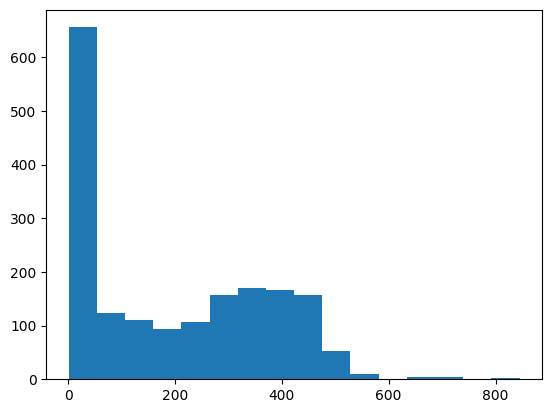

In [20]:
# ヒストグラムを描画する
plt.hist(df_degree['deg'], bins="auto")
plt.show()


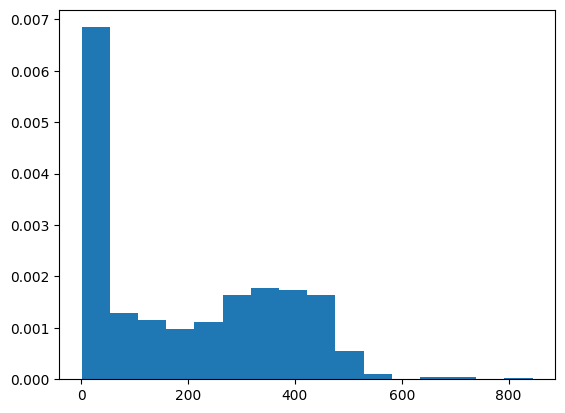

In [22]:
# 次数分布を描画する
# 正規化してプロットする
plt.hist(df_degree['deg'], bins="auto", density=True)
plt.show()

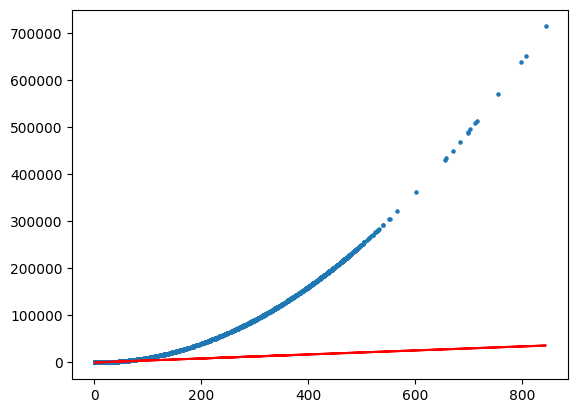

In [24]:
# metcalfeの法則を描画する
# まだ未完成

# ノード数を取得
n_nodes = len(df_degree)
# ノード数の平方根を取得
sqrt_n_nodes = np.sqrt(n_nodes)
# プロットする
plt.scatter(df_degree['deg'], df_degree['deg']**2, s=5)
plt.plot(df_degree['deg'], df_degree['deg']*sqrt_n_nodes, color='red')
plt.show()


In [26]:
# スモールワールド性を計算する
# ノード数の対数を取得
log_n_nodes = np.log(n_nodes)

# 平均次数を計算する
avg_deg = df_degree['deg'].mean()
log_avg_deg = np.log(avg_deg)

avg_distance = log_n_nodes/log_avg_deg
print("avg distance: ", avg_distance)

avg distance:  1.4218309512613745


In [27]:
print("log n nodes: ", log_n_nodes)
print("log avg deg: ", log_avg_deg)

log n nodes:  7.504942068396171
log avg deg:  5.278364535346609


n edges:  14122676
avg cluster coefficient:  118.93747982291892


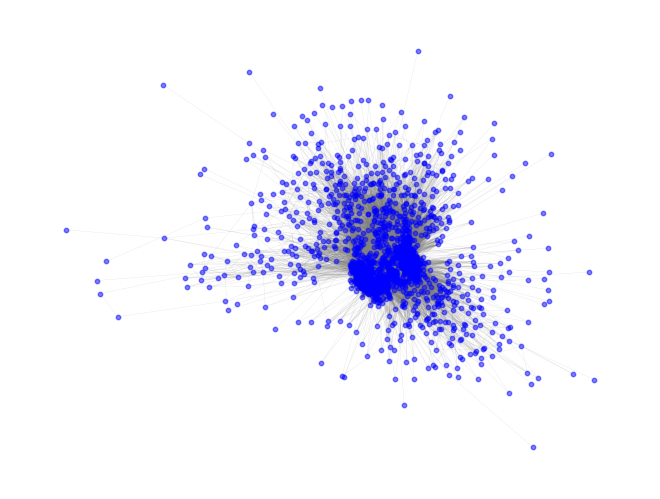

In [34]:
# 平均クラスター係数を計算する
# クラスター係数を計算する
# まず、エッジの数を計算する
n_edges = df_edge['count'].sum()
print("n edges: ", n_edges)

# クラスター係数を計算する
avg_cluster_coefficient = 3*n_edges/(avg_deg*n_nodes)
print("avg cluster coefficient: ", avg_cluster_coefficient)

# ネットワークを描画する
# NetworkXをインポートする
import networkx as nx

# ネットワークを作成する
G = nx.Graph()

# ノードを追加する
for i in range(len(df_degree)):
    G.add_node(df_degree['start_station_id'][i])

# エッジを追加する
for i in range(len(df_edge)):
    # Key Errorが出るので、tryでエラーを回避する
    try:
        G.add_edge(df_edge['start_station_id'][i], df_edge['end_station_id'][i])
    except:
        pass

# ネットワークを描画する
nx.draw(G, with_labels=False, node_size=10, width=0.1, node_color='blue', edge_color='gray', alpha=0.5)
plt.show()


In [35]:
# kは次数
k = df_degree["deg"]

# クラスター係数
# 次数kを持つノードのクラスター係数を計算する
# クラスター係数を格納するリストを作成する
cc = []

# 次数kを持つノードのクラスター係数を計算する

for i in range(len(k)):
    # 次数kを持つノードの数を計算する
    n_k = len(df_degree[df_degree['deg'] == k[i]])
    # 次数kを持つノードのエッジの数を計算する
    e_k = df_edge[df_edge['start_station_id'] == k[i]]['count'].sum()
    # 次数kを持つノードのクラスター係数を計算する
    if n_k <= 1:
        cc.append(0)
    else:
        cc.append(2*e_k/(n_k*(n_k-1)))
        

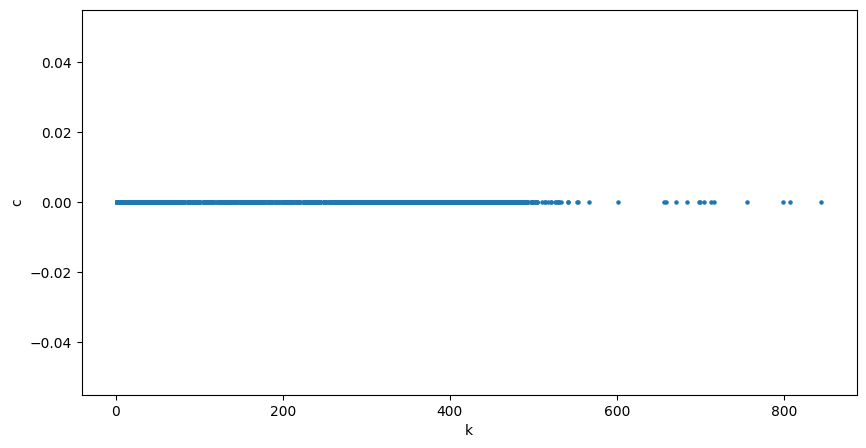

In [37]:
# kとccをプロットする
plt.figure(figsize=(10, 5))
plt.scatter(k, cc, s=5)
plt.xlabel('k')
plt.ylabel('c')
plt.show()

# あれ？なんか違うな